In [ ]:
prov_to_index = ["Bangkok Metropolis","Samut Prakan","Nonthaburi","Pathum Thani","Phra Nakhon Si Ayutthaya","Ang Thong","Lop Buri","Sing Buri","Chai Nat","Saraburi","Chon Buri","Rayong","Chanthaburi","Trat","Chachoengsao","Prachin Buri","Nakhon Nayok","Sa Kaeo","Nakhon Ratchasima","Buri Ram","Surin","Si Sa Ket","Ubon Ratchathani","Yasothon","Chaiyaphum","Amnat Charoen","Bueng Kan","Nong Bua Lam Phu","Khon Kaen","Udon Thani","Loei","Nong Khai","Maha Sarakham","Roi Et","Kalasin","Sakon Nakhon","Nakhon Phanom","Mukdahan","Chiang Mai","Lamphun","Lampang","Uttaradit","Phrae","Nan","Phayao","Chiang Rai","Mae Hong Son","Nakhon Sawan","Uthai Thani","Kamphaeng Phet","Tak","Sukhothai","Phitsanulok","Phichit","Phetchabun","Ratchaburi","Kanchanaburi","Suphan Buri","Nakhon Pathom","Samut Sakhon","Samut Songkhram","Phetchaburi","Prachuap Khiri Khan","Nakhon Si Thammarat","Krabi","Phangnga","Phuket","Surat Thani","Ranong","Chumphon","Songkhla","Satun","Trang","Phatthalung","Pattani","Yala","Narathiwat"]

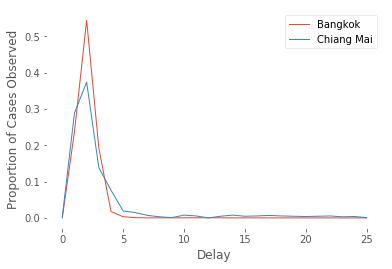

In [32]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['lines.linewidth']=1
plt.rcParams['axes.facecolor']='w'


p_hat_vec = []
n_t_ds = []
for prov in [10,48]:
    n_t_d = []
    with open("province-biweek_with_delays.csv") as f:
        i = 0
        for line in f.readlines():
            if i > 0:
                n_t_d.append(line.replace("\n","").split(','))
            i+=1


    n_t_d_1 = []

    for elm in n_t_d:
        #print (elm[2])
        if elm[2] == str(prov):
            n_t_d_1.append(elm)


    index_to_dates = {}
    dates_to_index = {}
    count = 0
    for i in ["2014","2015","2016"]:
        for j in range(1,27):
            index_to_dates[count] = str(i)+str(j)
            dates_to_index[str(i)+str(j)] = count
            count +=1

    reporting_matrix = np.zeros((26*3,26*3))

    for elm in n_t_d_1:
        try:
            sick_date = elm[0]+elm[1]
            report_date = elm[-2] + elm[-1]
            cases = elm[3]
            reporting_matrix_row = dates_to_index[sick_date] 
            reporting_matrix_col =  dates_to_index[report_date] 
            reporting_matrix[reporting_matrix_row,reporting_matrix_col] = int(cases)
        except:
            pass
    np.set_printoptions(suppress=True)    #np.set_printoptions(threshold=np.nan)
    D=26
    n_t_d = np.zeros((len(reporting_matrix),D))

    for i in range(len(reporting_matrix)):
        for j in range(i,i+D):
            try:
                n_t_d[i,j-i] = reporting_matrix[i][j]
            except:
                pass
    n_t_ds.append(n_t_d)
        
n_t_ds = np.array(n_t_ds)

for itr in range(len(n_t_ds)):
    plt.plot(np.sum(n_t_ds[itr],axis=0)/np.sum(n_t_ds[itr]))

plt.xlabel("Delay")
#plt.title("Delay Proportions Across All Provinces")
plt.ylabel("Proportion of Cases Observed")
plt.legend(("Bangkok","Chiang Mai"))
plt.show()
    
     

In [119]:
#print p_hat_vec


np.savetxt("FOOBAH.csv", p_hat_vec, delimiter=",")
